<a href="https://colab.research.google.com/github/joykangangi/DataSciencePlayground/blob/main/k_Nearest_Neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#31394d'>Practical Exercise: k-Nearest Neighbours</font>

In this notebook, we are going to train a k-nearest neighbours model using the [`scikit-learn`](https://scikit-learn.org) library. k-nearest neighbours is a *supervised learning* technique that is suitable for both *regression* (a continuous/numerical outcome) and *classification* (a categorical outcome). In this notebook, we will use it for regression.  

We begin by importing modules for data wrangling:

<!-- 
Even though its name is scikit-learn, it is imported as `sklearn`. It has many submodules.
For example, the `datasets` submodule has a group of simple datasets that can be used to evaluate models without having to use external files.

The Boston Housing dataset is available as a scikitlearn dataset.-->

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## <font color='#31394d'> Get and Explore the Data </font>

We'll be using is the [Boston Housing](https://www.kaggle.com/c/boston-housing) dataset from Kaggle. This dataset consists of information about houses in the Boston area. Our goal is to **predict the typical price of a house**.

We import the data from the ``sklearn`` module as follows:

In [2]:
from sklearn import datasets
boston = datasets.load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

`sklearn` datasets behave like a dictionary. Let's see what this dictionary contains:

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

The `DESCR` key includes a description of the dataset:

In [ ]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The `target` key holds the target/outcome variable; in this case, the median house value in thousands of dollars.

In [ ]:
boston["target"] 

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

The names of the features/independent variables are stored under the `feature_names` key:

In [ ]:
boston["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Finally, the values of the features are stored as a numpy array under the `data` key:

In [ ]:
boston["data"]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

Let's put the Boston data into a pandas dataframe:

In [ ]:
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])

df["PRICE"] = boston["target"]

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## <font color='#31394d'> Training a KNN Model </font>

The algorithms for fitting k-nearest neighbours models are in the `neighbors` submodule of `sklearn`. There are `KNeighborsRegressor` and `KNeighborsClassifier` classes for KNN regression and classification, respectively. Since we're dealing with a continuous outcome variable (`PRICE`), we'll import the `KNeighborsRegressor` class and create (instantiate) an *estimator* object. Note that this is the standard procedure for any machine learning algo available in `sklearn`. 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

The object that we have called `knn` is our as yet untrained machine learning model. After training, it will be updated to contain all the information that is needed to make predictions on new data. Since we did not specify anything between the brackets in `KNeighborsRegressor()`, the object will be instantiated with the default parameters. It is usually a good idea to inspect these defaults (so that you understand the specifics of the model you are fitting) and to change them if needs be:

In [ ]:
?knn

Type:        KNeighborsRegressor
String form: KNeighborsRegressor()
File:        c:\users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py
Docstring:  
Regression based on k-nearest neighbors.

The target is predicted by local interpolation of the targets
associated of the nearest neighbors in the training set.

Read more in the :ref:`User Guide <regression>`.

.. versionadded:: 0.9

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which acc

🚀 <font color='#d9c4b1'> Exercise: </font> What is the default value of k? ans=5, from the docs

Let's fit the model to our boston dataset using the `knn` object's `fit` method:

In [ ]:
knn.fit(X=df.iloc[:,:-1], y=df.PRICE)

KNeighborsRegressor()

The `knn` object has now been updated so it is ready to make predictions:

In [ ]:
y_hat = knn.predict(X=df.iloc[:,:-1])
y_hat

array([21.78, 22.9 , 25.36, 26.06, 27.1 , 27.1 , 20.88, 19.1 , 18.4 ,
       19.48, 19.28, 22.  , 24.34, 20.52, 24.66, 21.3 , 30.48, 20.4 ,
       15.7 , 23.54, 16.82, 17.64, 18.3 , 17.08, 16.66, 15.1 , 16.78,
       14.94, 19.94, 18.34, 14.1 , 16.82, 15.12, 14.1 , 15.12, 26.92,
       22.14, 27.4 , 28.44, 31.88, 31.88, 25.36, 25.36, 24.22, 20.68,
       20.44, 20.44, 18.1 , 18.1 , 24.  , 21.54, 24.  , 27.16, 27.16,
       25.7 , 39.82, 27.08, 38.28, 24.8 , 25.64, 21.78, 33.6 , 21.78,
       24.06, 31.74, 25.3 , 26.98, 22.18, 20.42, 20.42, 27.76, 29.5 ,
       27.76, 27.76, 22.92, 21.64, 25.82, 21.64, 21.38, 22.02, 24.8 ,
       21.88, 25.22, 25.64, 25.98, 25.98, 23.28, 25.98, 24.02, 25.58,
       25.58, 25.06, 26.34, 26.04, 30.1 , 24.84, 23.62, 24.32, 28.52,
       24.96, 22.1 , 22.2 , 15.34, 19.74, 19.74, 19.66, 19.56, 21.34,
       19.66, 19.56, 22.08, 20.1 , 19.6 , 17.54, 20.1 , 17.7 , 20.2 ,
       20.1 , 20.66, 19.8 , 22.76, 20.6 , 19.66, 18.52, 19.66, 20.6 ,
       18.52, 16.62,

Let's see how our predicted prices look relative to the true prices:

<AxesSubplot:xlabel='PRICE'>

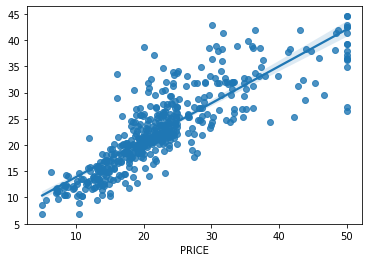

In [ ]:
sns.regplot(x=df.PRICE, y = y_hat)

<AxesSubplot:xlabel='PRICE'>

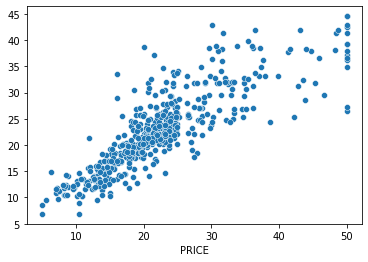

In [ ]:
sns.scatterplot(x=df.PRICE, y=y_hat)

## <font color='#31394d'> Model Evaluation </font>

We should never be used to evaulate a model's performance. Instead, we should evaluate our model on new, unseen data. We can do this in one of two ways: (1) split the data into training and test sets or (2) use cross-validation. Let's see how we would implement these

### <font color='#31394d'> 1. Train/Test Split </font>

Before we train our KNN model (i.e. call the `fit` method), we can split the data into training and test sets. We then call the `fit` method on the training set and the `predict` method on the test set. Usually, the training set is larger than the test set (75%/25% and 80%/20% splits are common).

We can use the `train_test_split` function from the `sklearn` module to easily split the dataset into training and test subsets. We use the argument `test_size` to define the % size of the test dataset.

The full dataset is divided row-wise into training and test sets *at random*. This means that each time we run `train_test_split`, we will get different datasets. In order to make sure that we get the same splits again and again, we can fix the *random seed*; that is, the number that numpy uses to start its random number generation (used to calculate the splits). We can use the argument `random_state` to set the random seed for `train_test_split`.

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=12345)

print('Training set has', train.shape[0], 'rows')
print('Test set has', test.shape[0], 'rows')

Training set has 404 rows
Test set has 102 rows


Now we <font color='#d9c4b1'>**FIT**</font> the model on the <font color='#d9c4b1'>**TRAINING DATA**</font>:

In [ ]:
model = KNeighborsRegressor()
model.fit(X=train.iloc[:,:-1], y=train.PRICE)

KNeighborsRegressor()

And <font color='#d9c4b1'>**PREDICT**</font> on the <font color='#d9c4b1'>**TEST DATA**</font>:

In [ ]:
y_hat = model.predict(X=test.iloc[:,:-1])

Now we can calculate our evaluation metrics using scikit-learn's `metrics` submodule. These functions take the actual values and predicted values of the outcome variable as arguments:

<AxesSubplot:xlabel='PRICE'>

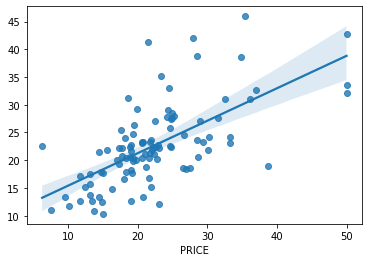

In [ ]:
sns.regplot(x=test.PRICE, y=y_hat)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mean_squared_error(y_true=test['PRICE'], y_pred=y_hat)

41.42091372549021

In [ ]:
mean_absolute_error(y_true=test['PRICE'], y_pred=y_hat)

4.732352941176471

The magnitudes of the MSE and MAE are dependent on how the outcome variable is measured. They are therefore not comparable across datasets, but are useful for model and feature selection on a given dataset.

#### <font color='#d9c4b1'> Choosing k </font>

We can use the train/test split to find the optimal value for k:

In [ ]:
knn1 = KNeighborsRegressor(n_neighbors = 1) # K = 1
knn1.fit(X=train.iloc[:,:-1], y=train.PRICE)
y_hat1 = knn1.predict(X=test.iloc[:,:-1])

knn3 = KNeighborsRegressor(n_neighbors = 3) # K = 3
knn3.fit(X=train.iloc[:,:-1], y=train.PRICE)
y_hat3 = knn3.predict(X=test.iloc[:,:-1])

knn5 = KNeighborsRegressor(n_neighbors = 5) # K = 5
knn5.fit(X=train.iloc[:,:-1], y=train.PRICE)
y_hat5 = knn5.predict(X=test.iloc[:,:-1])

In [ ]:
print('MAE')
print('K = 1\t', mean_absolute_error(y_true=test['PRICE'], y_pred=y_hat1))
print('K = 3\t', mean_absolute_error(y_true=test['PRICE'], y_pred=y_hat3))
print('K = 5\t', mean_absolute_error(y_true=test['PRICE'], y_pred=y_hat5))

MAE
K = 1	 5.447058823529412
K = 3	 4.669607843137255
K = 5	 4.732352941176471


The KNN model with k=3 has the lowest MAE on new data and is therefore the best. 

🚀 <font color='#d9c4b1'> Exercise: </font> Try the MSE metric and see if you reach the same conclusion.

In [ ]:
print('MSE')
print('K = 1\t', mean_squared_error(y_true=test['PRICE'], y_pred=y_hat1))
print('K = 3\t', mean_squared_error(y_true=test['PRICE'], y_pred= y_hat3))
print('K = 5\t', mean_squared_error(y_true=test['PRICE'], y_pred= y_hat5))

MSE
K = 1	 58.586078431372556
K = 3	 45.35454248366013
K = 5	 41.42091372549021


### <font color='#31394d'> 2. Cross Validation </font>

Cross validation is an alternative approach to evaluate out-of-sample model performance. To do cross validation, we simply split the data into *K* folds, and for each fold, we train the model on the data from the *K*-1 remaining folds and evaluate on the one that was not included in the training set. That way, we get out-of-sample predictions and errors for every data point, so we don't rely on a single test set. 

For example, a 5 fold cross validation would look like this:

![title](media/cross_validation.png)

The `cross_val_score` function in `scikit-learn` computes your choice of evaluation metric for each fold. To use this function, we first need to see what "scoring methods" are available:

In [ ]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

Looks like it defines the evaluation metrics such that "bigger is better". So, if we want to use MSE, for example, we need to choose "neg_mean_squared_error" (the negative MSE).

Note that we do **NOT** do a train/test split. We use the full dataset in the dataframe `df`.

In [ ]:
from sklearn.model_selection import cross_val_score

knn_mod_5 = KNeighborsRegressor(n_neighbors = 5)

cv_scores = cross_val_score(estimator=knn_mod_5, X=df.iloc[:,:-1], y=df.PRICE, scoring="neg_mean_squared_error", cv=5)
cv_scores

array([ -72.84204314,  -77.44044752, -114.19790495,  -89.00506931,
        -31.22948515])

The cross-validated MSE for KNN model with $K=5$ is therefore:

In [ ]:
-cv_scores.mean()

76.9429900135896

🚀 <font color='#d9c4b1'> Exercise: </font> Repeat the above for $K=1$ and $K=3$, and determine which value is best using 5-fold cross validation.

In [ ]:
def find_bestK(k:int):
    cv_scores = cross_val_score(estimator=KNeighborsRegressor(n_neighbors=k), X=df.iloc[:,:-1], y=df.PRICE, scoring="neg_mean_squared_error", cv=5 )
    print("K = {}\t Mean: {}".format(k,-cv_scores.mean()))

In [ ]:
find_bestK(1)
find_bestK(3)

K = 1	 Mean: 105.87429605901768
K = 3	 Mean: 78.7023856640566


If we want to get more information about each split, we can use the `cross_validate` function instead. It also accepts multiple scoring functions/evaluation metrics. Think of `cross_val_score` as the simplified version of `cross_validate`...

In [ ]:
from sklearn.model_selection import cross_validate
scoring_functions = {"negMSE": "neg_mean_squared_error", "negMAE": "neg_mean_absolute_error"}
cv_info = cross_validate(estimator=model, X=df.iloc[:,:-1], y=df.PRICE, scoring=scoring_functions, cv=5, return_train_score=False)
cv_df = pd.DataFrame(cv_info)
cv_df

,fit_time,score_time,test_negMSE,test_negMAE
0,0.004987,0.002991,-72.842043,-6.519804
1,0.002993,0.003016,-77.440448,-5.703960
2,0.001969,0.003018,-114.197905,-7.652871
3,0.001970,0.002020,-89.005069,-6.091881
4,0.001995,0.001994,-31.229485,-4.113465


We get results for each one of the folds:
- fit time = how long it took to train the model
- score time = how long it took to make predictions and compute the score
- test and train scores are given for each one of the scoring functions

In [ ]:
cv_df.loc[:,cv_df.columns.str.startswith('test')].mean()

test_negMSE   -76.942990
test_negMAE    -6.016396
dtype: float64